# Perkenalan

Nama Arry Pandowo, Batch 1 Full Stack Data Science Hacktiv8

# Library

In [144]:
import numpy as np
import scipy as sp
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Data Loading

In [90]:
df = pd.read_csv("ks-projects-201801.csv")
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Didapat informasi terkait dengan dataset : 
* Range Data 378661 entries dengan input value 378660 dan 1 row berisikan nama table
* 15 kolom termasuk 1 kolom untum nomor
* dapat dilihat dari jumlah terdapat missing values pada kolom name, dapat dilihat lebih lanjut dibawah

# Data Cleaning

## Identifikasi missing value

In [92]:
df.isnull().sum().sort_values(ascending = False)

usd pledged         3797
name                   4
ID                     0
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged_real       0
usd_goal_real          0
dtype: int64

terdapat 4 missing value dari dataset diatas pada kolom name

## Drop missing value

dikarenakan jumlah data missing value tidak signifikan (hanya 4 dari 378657 entries pada kolom name) maka diputuskan untuk drop missning value tersebut

In [93]:
df.dropna(inplace=True)

In [94]:
df.isnull().sum().sort_values(ascending = False)

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

Data telah bersin dari null dan N/A, data siap untuk digunakan

# Central Tendency of Data

## Category

### Modus

In [95]:
colCat = df["category"].unique()
colCat.shape

(159,)

In [96]:
df["category"].mode()

0    Product Design
dtype: object

<AxesSubplot:>

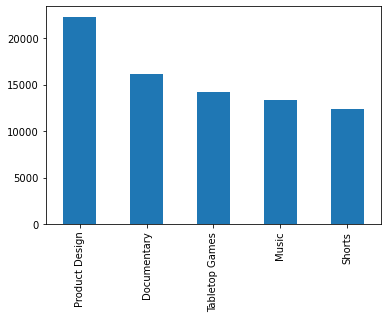

In [97]:
df.category.value_counts().head()
df.category.value_counts().head().plot(kind='bar')

Dalam 159 unique category, modusnya adalah Product Design

## Main_Category

### Modus

In [98]:
colMaCat = df["main_category"].unique()
colMaCat.shape

(15,)

In [99]:
df["main_category"].mode()

0    Film & Video
dtype: object

<AxesSubplot:>

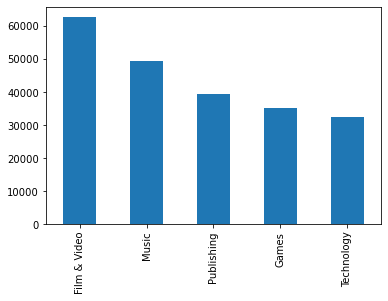

In [100]:
df.main_category.value_counts().head()
df.main_category.value_counts().head().plot(kind='bar')

Dalam Main category terdapat 15 unique value dengan modus Film & Video

## Currency

In [101]:
colCur = df["currency"].unique()
colCur.shape

(14,)

In [102]:
df["currency"].mode()

0    USD
dtype: object

<AxesSubplot:>

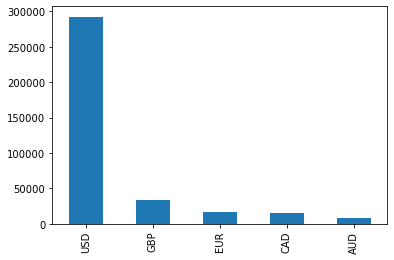

In [103]:
df.currency.value_counts().head()
df.currency.value_counts().head().plot(kind='bar')

Dalam Currency terdapat 14 unique value dengan modus USD

## Goal

Dikarenakan terdapat data yang masih dalam bentuk currency mata uang selain USD, karena convert nya di literasi  *[Berikut](https://www.kaggle.com/tonyplaysguitar/convert-ks-pledges-to-usd/)*  terlalu complicated (ribet dan butuh extra upload space 100mb), maka yang dihitung modus, median dan mean nya hanya USD nya saja pun secara  modus dari USD paling signifikan.

### Mean dan Median USD Only

In [104]:
curGoal = df.filter(items=["currency", "goal"])
usdOnly = curGoal.loc[(curGoal["currency"]=="USD")]

print("Mean USD Only", usdOnly.mean())
print("Median USD Only", usdOnly.median())

Mean USD Only goal    44034.609533
dtype: float64
Median USD Only goal    5250.0
dtype: float64


### Modus

In [105]:
df["goal"].mode()

0    5000.0
dtype: float64

## State

In [106]:
colSta = df["state"].unique()
colSta.shape

(5,)

In [107]:
df["state"].mode()

0    failed
dtype: object

<AxesSubplot:>

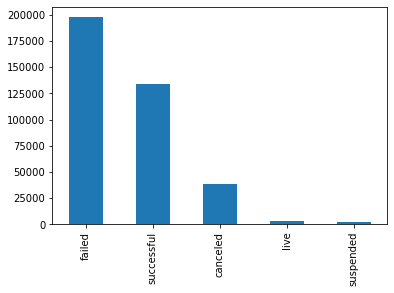

In [108]:
df.state.value_counts().head()
df.state.value_counts().head().plot(kind='bar')

Dalam state terdapat 5 unique value dengan modus Failed

## Backers

### Mean

In [109]:
df["backers"].mean()

106.68836632342742

### Median

In [110]:
df["backers"].median()

12.0

### Modus

In [111]:
df["backers"].mode()

0    0
dtype: int64

## Country

In [112]:
colCou = df["country"].unique()
colCou.shape

(22,)

In [113]:
df["country"].mode()

0    US
dtype: object

<AxesSubplot:>

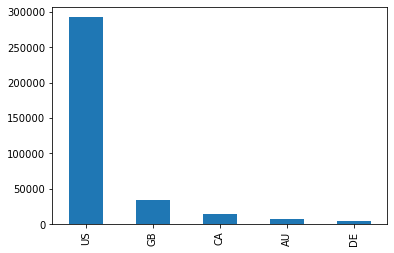

In [114]:
df.country.value_counts().head()
df.country.value_counts().head().plot(kind='bar')

Terdapat 22 Unique Value dengan Modus US

# Measure of Variance (range, percentile and quartile, standard deviation)

untuk variance data yang akan dihitung adalah jumlah goals dan total backers nya saja

## Range

In [115]:
numcols = ['goal', 'backers']
for col in numcols:
    print(df[col].name + ' range: ' + str(df[col].max() - df[col].min()))

goal range: 99999999.99
backers range: 219382


## Percentile and Quartile

In [116]:
print("Percentilestats Goals", stats.percentileofscore(df['goal'], 50, 'rank'))
print("Percentilestats Backers", stats.percentileofscore(df['backers'], 50, 'rank'))

Percentilestats Goals 0.821506695833111
Percentilestats Backers 72.84319479272261


In [117]:
print(df['goal'].quantile([0.25, 0.5, 0.75]))
print(df['backers'].quantile([0.25, 0.5, 0.75]))

0.25     2000.0
0.50     5500.0
0.75    16500.0
Name: goal, dtype: float64
0.25     2.0
0.50    12.0
0.75    57.0
Name: backers, dtype: float64


## Variance

In [118]:
for col in numcols:
    print(df[col].name + " variance :" + str(df[col].var()))

goal variance :1414581018455.966
backers variance :831215.3505826988


## Standard Deviation

In [119]:
for col in numcols:
    print(df[col].name + " Standard Deviation :" + str(df[col].std()))

goal Standard Deviation :1189361.6012197325
backers Standard Deviation :911.7101242076337


# Confidence Interval

Dikarenakan penelitian ini merupakan kategori dari social science, maka confidence level yang akan digunakan adalah 95% yang artinya angka dari alpha yang digunakan adalah 0.95 

In [120]:
print("Confidence Interval Goal", stats.norm.interval(alpha=0.95, loc=np.mean(df["goal"]), scale=stats.sem(df["goal"])))
print("Confidence Interval Backers", stats.norm.interval(alpha=0.95, loc=np.mean(df["backers"]), scale=stats.sem(df["backers"])))

Confidence Interval Goal (45715.59806265791, 53330.379619516796)
Confidence Interval Backers (103.76979495207321, 109.60693769478162)


Interpretasi dari angka tersebut adalah sebagai berikut : 
* terdapat 95% confidence interval dari Goal adalah (45715.59 , 53330.37)
* terdapat 95% confidence interval dari backers adalah (103.76, 109.60)

# Penentuan Hypotesis yang akan diuji

In [121]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Dalam data data yang disampaikan diatas terdapat beberapa hal menarik yang dapat diperhatikan : 
* Mata uang yang paling banyak digunakan dalam kegiatan crowdfunding yang ada di kick starter adalah USD
* Negara terbanyak yang melakukan aktivitas pemberian dana crowdfunding ada di US
* lebih banyak jumlah crowdfunding yang dinyatakan gagal apabila dibandingkan dengan yang successful

berdasarkan data tersebut maka menarik untuk diteliti terkait hal berikut : 
> Apakah negara US dan non US membawa pengaruh positif atas keberhasilan dari sebuah crowd funding? 

atas pertanyaan tersebut maka disusun hypothesis sebagai berikut : 
* H0 mengindikasikan bahwa negara US memberikan pengaruh terhadap tingkat keberhasilan sebuah crowd funding
* H1 mengindikasikan bahwa negara US tidak memberikan pengaruh terhadap tingkat keberhasilan sebuah crowd funding

notasi matematits atas hypothesis diatas adalah sebagai berikut :
$$H_0: p = p_0$$
$$H_a: p \ne p_0$$

sesuai dengan yang disebutkan diatas, confidence level yang akan digunakan adalah 95%

* A `Sukses` dari tabel state  - adalah variable succcess dari tabel state merupakan campaign kickstarter yang telah dinyatakan berhasil dari jumlah pendanaan dari tabel goal yang ditentukan oleh founder dari crowdfunding
* A `Gagal` dari tabel state - adalah variable failed dari tabel state merupakan campaign kickstarter yang gagal mencapai goals yang ditentukan sampai dengan waktu yagn telah ditetapkan .

kedua variable tersebut akan digunakan sebagai **inddependent variable** pada hypothesis testing ini

sementara negara US dan Non US akan digunakan sebagai **dependent variable**

# Data Cleaning

Sample yang ditetapkan adalah 3% dari total populasi masing masing variable

In [122]:
totPop = df.loc[(df["state"]=="successful") | (df["state"]=="failed")]
totPop

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,6500.0,2017-03-20 22:08:22,154.0,failed,4,US,0.0,154.0,6500.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


Total Populasi dari state successfull dan failed adalah sebesar 331462

In [123]:
Population = 331462
Samplesize = 0.1
Sample = round(Population * Samplesize)
Sample

33146

# Data Preprocessing

## Penetapan Sample

In [124]:
random.seed(5)
sukses = totPop[totPop['state'] == 'successful'].sample(n=33146)
gagal = totPop[totPop['state'] == 'failed'].sample(n=33146)

sampleAB = pd.concat([sukses, gagal])
sampleAB.reset_index(drop=True, inplace=True)

sampleAB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                66292 non-null  int64  
 1   name              66292 non-null  object 
 2   category          66292 non-null  object 
 3   main_category     66292 non-null  object 
 4   currency          66292 non-null  object 
 5   deadline          66292 non-null  object 
 6   goal              66292 non-null  float64
 7   launched          66292 non-null  object 
 8   pledged           66292 non-null  float64
 9   state             66292 non-null  object 
 10  backers           66292 non-null  int64  
 11  country           66292 non-null  object 
 12  usd pledged       66292 non-null  float64
 13  usd_pledged_real  66292 non-null  float64
 14  usd_goal_real     66292 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 7.6+ MB


## Convert US and Non US

Untuk keperluan analisa data, diperlukan kuantifikasi berdasarkan kategori atas US (1) dan negara Non US (2)

In [135]:
nonUS = ['GB', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG', 'JP']
numCat = sampleAB['country'].replace(to_replace="US", value=1)
convertNum = numCat.replace(to_replace=nonUS, value=0)
convertNum

0        1
1        1
2        1
3        1
4        2
        ..
66287    1
66288    1
66289    1
66290    1
66291    1
Name: country, Length: 66292, dtype: int64

## Replace country dengan convertNum

replace atas hasil konversi diatas ke tabel data SampleAB

In [136]:
sampleAB["country"] = convertNum

## Visualisasi hasil

In [127]:
pengaruh = sampleAB.groupby('state')['country']

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: stats.sem(x, ddof=0) 

pengaruh = pengaruh.agg([np.mean, std_p, se_p])
pengaruh.columns = ['pengaruh', 'std', 'std_error']

pengaruh

,pengaruh,std,std_error
state,,,
failed,1.230827,0.421362,0.002314
successful,1.187564,0.390364,0.002144


berdasarkan hasil berikut, didapat bahwa antara sukses dan fail memiliki pengaruh yang tidak jauh beda dengan standar deviasi 0,422 dengan visualisasi sebagai berikut : 

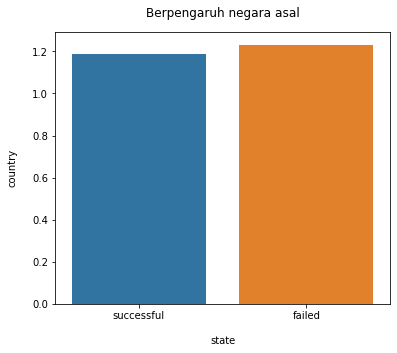

In [137]:
plt.figure(figsize=(6,5))

sns.barplot(x=sampleAB['state'], y=sampleAB['country'], ci=False)

plt.title('Berpengaruh negara asal', pad=15)
plt.xlabel('state', labelpad=15)
plt.ylabel('country', labelpad=15);

## Hypotesis Testing 

In [149]:
sampleAB.shape

(66292, 15)

In [156]:
gSuccessful = sampleAB[sampleAB['state'] == 'successful']['country']
gFailed = sampleAB[sampleAB['state'] == 'failed']['country']

In [155]:
totSukses = gSuccessful.count()
totFailed = gFailed.count()

successes = [gSuccessful.sum(),gFailed.sum()]
nobs = [totSukses, totFailed]

In [157]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [177]:
z_stat, pval = proportions_ztest(nobs, successes)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(nobs, successes, alpha=0.05)

In [178]:
print('p-value = ' , pval)
print('z-stat = ' , z_stat)
print('95% for control group = ',lower_con, upper_con)
print('95% for treatment group = ',lower_treat, upper_treat) 

p-value =  1.6495191988122763e-28
z-stat =  11.075502639444816
95% for control group =  0.8384571545902106 0.8456624501147154
95% for treatment group =  0.8086739584175994 0.8162494428128834


Kesimpulan : 

> hasil p-value (1.64) berada diatas critical-value (0.05) maka H1 ditolak, dan H0 diterima yang artinya negara US memberikan pengaruh terhadap tingkat keberhasilan sebuah crowd funding
